# Bayes Classifier using Probabilities

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss

In [4]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

In [6]:
import itertools

In [7]:
data = loan_approval_lib.load_original_data()

In [66]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [9]:
data_test = loan_approval_lib.load_data()['test']

In [10]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


# Categorical Bayes Classifier

In [67]:
categorical_predictors = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
categorical_predictor_combinations = []

for count in range(1, len(categorical_predictors) + 1):
    for combination in itertools.combinations(categorical_predictors, count):
        categorical_predictor_combinations.append(list(combination))

data_categorical = [
    data[categorical_predictor_combination].copy() for categorical_predictor_combination in categorical_predictor_combinations
]

len(data_categorical)

15

In [68]:
for dataset in data_categorical:
    print(dataset.columns.tolist())

['person_home_ownership']
['loan_intent']
['loan_grade']
['cb_person_default_on_file']
['person_home_ownership', 'loan_intent']
['person_home_ownership', 'loan_grade']
['person_home_ownership', 'cb_person_default_on_file']
['loan_intent', 'loan_grade']
['loan_intent', 'cb_person_default_on_file']
['loan_grade', 'cb_person_default_on_file']
['person_home_ownership', 'loan_intent', 'loan_grade']
['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']
['loan_intent', 'loan_grade', 'cb_person_default_on_file']
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [156]:
dataset

,person_home_ownership,loan_intent,loan_status
0,RENT,PERSONAL,1
1,OWN,EDUCATION,0
2,MORTGAGE,MEDICAL,1
3,RENT,MEDICAL,1
4,RENT,MEDICAL,1
...,...,...,...
32576,MORTGAGE,PERSONAL,0
32577,MORTGAGE,PERSONAL,0
32578,RENT,HOMEIMPROVEMENT,1
32579,MORTGAGE,PERSONAL,0


### This section to figure out how the logic should work

Previous logic did not work with more than one column

In [113]:
dataset = data_categorical[4].copy()

columns = dataset.columns.tolist()
dataset['loan_status'] = data['loan_status']
#print(dataset)
output_data = {
    column: [] for column in columns
}
output_data['proba'] = []

In [105]:
print(output_data)

{'person_home_ownership': [], 'loan_intent': [], 'proba': []}


In [98]:
output_df = pandas.DataFrame(output_data)
output_df

,person_home_ownership,loan_intent,proba


In [80]:
for column in columns:
    for value in sorted(dataset[column].unique()):
        print(f'{column}: {value}')

person_home_ownership: MORTGAGE
person_home_ownership: OTHER
person_home_ownership: OWN
person_home_ownership: RENT
loan_intent: DEBTCONSOLIDATION
loan_intent: EDUCATION
loan_intent: HOMEIMPROVEMENT
loan_intent: MEDICAL
loan_intent: PERSONAL
loan_intent: VENTURE


In [85]:
values = list(
    itertools.product(
        *[list(dataset[column].unique()) for column in columns]
    )
)
values

[('RENT', 'PERSONAL'),
 ('RENT', 'EDUCATION'),
 ('RENT', 'MEDICAL'),
 ('RENT', 'VENTURE'),
 ('RENT', 'HOMEIMPROVEMENT'),
 ('RENT', 'DEBTCONSOLIDATION'),
 ('OWN', 'PERSONAL'),
 ('OWN', 'EDUCATION'),
 ('OWN', 'MEDICAL'),
 ('OWN', 'VENTURE'),
 ('OWN', 'HOMEIMPROVEMENT'),
 ('OWN', 'DEBTCONSOLIDATION'),
 ('MORTGAGE', 'PERSONAL'),
 ('MORTGAGE', 'EDUCATION'),
 ('MORTGAGE', 'MEDICAL'),
 ('MORTGAGE', 'VENTURE'),
 ('MORTGAGE', 'HOMEIMPROVEMENT'),
 ('MORTGAGE', 'DEBTCONSOLIDATION'),
 ('OTHER', 'PERSONAL'),
 ('OTHER', 'EDUCATION'),
 ('OTHER', 'MEDICAL'),
 ('OTHER', 'VENTURE'),
 ('OTHER', 'HOMEIMPROVEMENT'),
 ('OTHER', 'DEBTCONSOLIDATION')]

In [78]:
print(columns)

['person_home_ownership', 'loan_intent']


In [114]:
for value in values:
    #print(value)
    dataset_copy = dataset
    for index, column in enumerate(columns):
        select_query = dataset_copy[column] == value[index]
        #print(f'select column {column} where value is {value[index]}')
        #print(len(dataset_copy))
        dataset_copy = dataset_copy[select_query]
        #print(len(dataset_copy))
    row_count = len(dataset_copy)
    row_count_where_loan_status_is_1 = len(dataset_copy[dataset_copy['loan_status'] == 1])
    P = row_count_where_loan_status_is_1 / row_count
    #print(f'P={P}')
    for index, column in enumerate(columns):
        output_data[column].append(value[index])
    output_data['proba'].append(P)

In [115]:
output_df = pandas.DataFrame(output_data)
output_df

,person_home_ownership,loan_intent,proba
0,RENT,PERSONAL,0.312845
1,RENT,EDUCATION,0.262115
2,RENT,MEDICAL,0.320700
3,RENT,VENTURE,0.265993
4,RENT,HOMEIMPROVEMENT,0.433507
5,RENT,DEBTCONSOLIDATION,0.357880
6,OWN,PERSONAL,0.062780
7,OWN,EDUCATION,0.054924
8,OWN,MEDICAL,0.099078
9,OWN,VENTURE,0.039440


In [117]:
output_df['proba'].mean() # don't expect exact match since there are not equal numbers of observations in each group

np.float64(0.2266151091220221)

In [121]:
dataset['loan_status'].sum() / len(dataset)

np.float64(0.21816396059052823)

In [120]:
(dataset[dataset['loan_status'] == 1])['loan_status'].count() / len(dataset)

np.float64(0.21816396059052823)

### Rebuild logic

In [181]:
def f(dataset):
    columns = dataset.columns.tolist()
    dataset['loan_status'] = data['loan_status']
    output_data = {
        column: [] for column in columns
    }
    output_data['proba'] = []
    output_data['event_count'] = []
    
    values = list(
        itertools.product(
            *[list(sorted(dataset[column].unique())) for column in columns]
        )
    )

    for value in values:
        dataset_filtered = dataset
        for index, column in enumerate(columns):
            select_query = dataset_filtered[column] == value[index]
            dataset_filtered = dataset_filtered[select_query]
        row_count = len(dataset_filtered)
        if row_count < 1:
            P = 0
        else:
            row_count_where_loan_status_is_1 = len(dataset_filtered[dataset_filtered['loan_status'] == 1])
            P = row_count_where_loan_status_is_1 / row_count
        for index, column in enumerate(columns):
            output_data[column].append(value[index])
        output_data['proba'].append(P)
        event_count = row_count
        output_data['event_count'].append(event_count)
    
    output_df = pandas.DataFrame(output_data)
    return output_df


data_categorical_model = {
    tuple(dataset.columns.tolist()): f(dataset.copy()) for dataset in data_categorical
}

In [182]:
[print(key) for key in data_categorical_model.keys()]
None

('person_home_ownership',)
('loan_intent',)
('loan_grade',)
('cb_person_default_on_file',)
('person_home_ownership', 'loan_intent')
('person_home_ownership', 'loan_grade')
('person_home_ownership', 'cb_person_default_on_file')
('loan_intent', 'loan_grade')
('loan_intent', 'cb_person_default_on_file')
('loan_grade', 'cb_person_default_on_file')
('person_home_ownership', 'loan_intent', 'loan_grade')
('person_home_ownership', 'loan_intent', 'cb_person_default_on_file')
('person_home_ownership', 'loan_grade', 'cb_person_default_on_file')
('loan_intent', 'loan_grade', 'cb_person_default_on_file')
('person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file')


In [184]:
# show the last one
data_categorical_model[list(data_categorical_model.keys())[-1]].sort_values(by=['event_count'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,proba,event_count
1,MORTGAGE,DEBTCONSOLIDATION,A,Y,0.000000,0
325,RENT,VENTURE,B,Y,0.000000,0
3,MORTGAGE,DEBTCONSOLIDATION,B,Y,0.000000,0
43,MORTGAGE,MEDICAL,A,Y,0.000000,0
59,MORTGAGE,PERSONAL,B,Y,0.000000,0
...,...,...,...,...,...,...
0,MORTGAGE,DEBTCONSOLIDATION,A,N,0.044148,974
56,MORTGAGE,PERSONAL,A,N,0.051724,986
14,MORTGAGE,EDUCATION,A,N,0.042025,1047
268,RENT,EDUCATION,B,N,0.228251,1069


In [189]:
tmp = data_categorical_model[list(data_categorical_model.keys())[-1]]
tmp[(tmp['event_count'] < 5) & (tmp['event_count'] > 0)]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,proba,event_count
12,MORTGAGE,DEBTCONSOLIDATION,G,N,1.00,2
13,MORTGAGE,DEBTCONSOLIDATION,G,Y,1.00,3
26,MORTGAGE,EDUCATION,G,N,1.00,3
27,MORTGAGE,EDUCATION,G,Y,1.00,1
39,MORTGAGE,HOMEIMPROVEMENT,F,Y,0.75,4
...,...,...,...,...,...,...
306,RENT,MEDICAL,G,N,1.00,3
307,RENT,MEDICAL,G,Y,1.00,4
320,RENT,PERSONAL,G,N,1.00,1
321,RENT,PERSONAL,G,Y,1.00,3


In [211]:
# just a check
data[
    (data['person_home_ownership'] == 'MORTGAGE') &
    (data['loan_intent'] == 'DEBTCONSOLIDATION') &
    (data['loan_grade'] == 'G')
]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict,loan_status_predict_round
17430,24,88000,MORTGAGE,2.0,DEBTCONSOLIDATION,G,25000,18.84,0.28,Y,2,1,1.0,1.0
22198,27,47000,MORTGAGE,11.0,DEBTCONSOLIDATION,G,7750,NaN,0.16,N,7,1,1.0,1.0
27016,34,108000,MORTGAGE,4.0,DEBTCONSOLIDATION,G,25000,20.03,0.23,N,8,1,1.0,1.0
27425,28,128000,MORTGAGE,11.0,DEBTCONSOLIDATION,G,14400,22.11,0.11,Y,8,1,1.0,1.0
28256,29,60000,MORTGAGE,13.0,DEBTCONSOLIDATION,G,25000,20.16,0.42,Y,9,1,1.0,1.0


In [191]:
len(tmp[tmp['event_count'] == 0])

91

In [194]:
len(tmp[tmp['event_count'] < 10])

195

In [195]:
len(tmp)

336

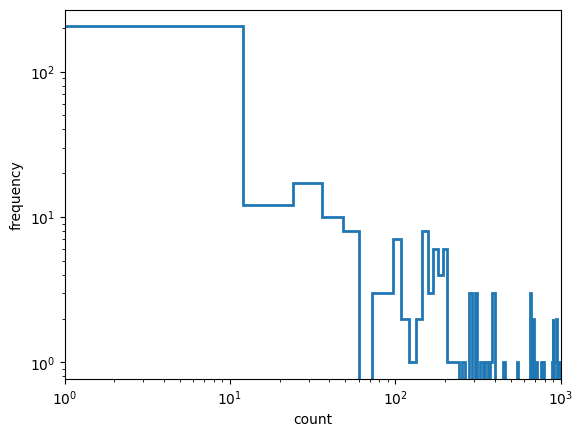

In [209]:
plt.hist(tmp['event_count'], bins=100, histtype='step', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, 1000)
plt.xlabel('count')
plt.ylabel('frequency')
plt.savefig('categorical_model_all_cols_event_count.pdf')
None

In [214]:
# print number of zero events for each model
for model_key in list(data_categorical_model.keys()):
    model = data_categorical_model[model_key]
    zero_count = model[model['event_count'] == 0]['event_count'].count()
    min_event_count = model['event_count'].min()
    print(f'{model_key}: {zero_count}, {min_event_count}')

# this model looks like it might be quite good
#
# the index is 11
#
# ('person_home_ownership', 'loan_intent', 'cb_person_default_on_file'): 0, 3

('person_home_ownership',): 0, 107
('loan_intent',): 0, 3605
('loan_grade',): 0, 64
('cb_person_default_on_file',): 0, 5745
('person_home_ownership', 'loan_intent'): 0, 12
('person_home_ownership', 'loan_grade'): 1, 0
('person_home_ownership', 'cb_person_default_on_file'): 0, 29
('loan_intent', 'loan_grade'): 0, 9
('loan_intent', 'cb_person_default_on_file'): 0, 696
('loan_grade', 'cb_person_default_on_file'): 2, 0
('person_home_ownership', 'loan_intent', 'loan_grade'): 14, 0
('person_home_ownership', 'loan_intent', 'cb_person_default_on_file'): 0, 3
('person_home_ownership', 'loan_grade', 'cb_person_default_on_file'): 10, 0
('loan_intent', 'loan_grade', 'cb_person_default_on_file'): 12, 0
('person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'): 91, 0


In [215]:
list(data_categorical_model.keys())[11]

('person_home_ownership', 'loan_intent', 'cb_person_default_on_file')

# Make Predictions

Use model "all columns"

In [138]:
data['loan_status_predict'] = numpy.zeros(len(data))
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1,0.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,0.0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,0.0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,0.0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,0.0


In [162]:
columns2 = categorical_predictors
print(columns2)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [173]:
for index, row in data.iterrows():
    data_categorical_model_filtered = data_categorical_model[list(data_categorical_model.keys())[-1]]
    
    #print(data_categorical_model_filtered)
    for column in columns2:
        value = row[column]
        select_query = data_categorical_model_filtered[column] == value
        data_categorical_model_filtered = data_categorical_model_filtered[select_query]
        #print(data_categorical_model_filtered)
        #if index < 5:
        #    print(len(data_categorical_model_filtered))
    P = data_categorical_model_filtered.iloc[0]['proba']
    #if index < 5:
    #    print(P)
    data.iat[index, data.columns.get_loc('loan_status_predict')] = P
data

0.6305418719211823
<class 'numpy.float64'>
0.05161290322580645
<class 'numpy.float64'>
0.19298245614035087
<class 'numpy.float64'>
0.2493573264781491
<class 'numpy.float64'>
0.22597402597402597
<class 'numpy.float64'>


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1,0.630542
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,0.051613
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0.192982
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0.249357
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,0.225974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,0.096447
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,0.051724
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,0.366812
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,0.090909


In [174]:
data['loan_status_predict_round'] = round(data['loan_status_predict'])

In [175]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict,loan_status_predict_round
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1,0.630542,1.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,0.051613,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0.192982,0.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0.249357,0.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,0.225974,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,0.096447,0.0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,0.051724,0.0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,0.366812,0.0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,0.090909,0.0


In [177]:
(data['loan_status_predict_round'] == data['loan_status']).sum() / len(data)

np.float64(0.8450016881004266)

In [179]:
data_test['loan_status'] = numpy.zeros(len(data_test))

for index, row in data_test.iterrows():
    data_categorical_model_filtered = data_categorical_model[list(data_categorical_model.keys())[-1]]
    
    for column in columns2:
        value = row[column]
        select_query = data_categorical_model_filtered[column] == value
        data_categorical_model_filtered = data_categorical_model_filtered[select_query]
    P = data_categorical_model_filtered.iloc[0]['proba']
    data_test.iat[index, data_test.columns.get_loc('loan_status')] = P

#data_test['loan_status_predict_round'] = round(data_test['loan_status_predict'])
#data_test['loan_status'] = data_test['loan_status_predict']

data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2,0.769231
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4,0.116022
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2,0.660714
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7,0.188557
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4,0.290698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4,0.093939
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3,0.042025
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25,0.051724
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4,0.170000


In [180]:
data_test[['id', 'loan_status']].to_csv('data_test_categorical_bayes_all_cols.csv', index=False)

# Make Predictions

Use model

```
('person_home_ownership', 'loan_intent', 'cb_person_default_on_file'): 0, 3
```

In [216]:
data['loan_status_predict'] = numpy.zeros(len(data))
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict,loan_status_predict_round
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1,0.0,1.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,0.0,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0.0,0.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0.0,0.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,0.0,0.0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,0.0,0.0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,0.0,0.0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,0.0,0.0


In [219]:
model_index = 11

In [220]:
model_key = list(data_categorical_model.keys())[model_index]
model_key

('person_home_ownership', 'loan_intent', 'cb_person_default_on_file')

In [221]:
model = data_categorical_model[model_key]
model

,person_home_ownership,loan_intent,cb_person_default_on_file,proba,event_count
0,MORTGAGE,DEBTCONSOLIDATION,N,0.139241,1975
1,MORTGAGE,DEBTCONSOLIDATION,Y,0.513353,337
2,MORTGAGE,EDUCATION,N,0.070982,2240
3,MORTGAGE,EDUCATION,Y,0.147287,387
4,MORTGAGE,HOMEIMPROVEMENT,N,0.116168,1472
5,MORTGAGE,HOMEIMPROVEMENT,Y,0.252788,269
6,MORTGAGE,MEDICAL,N,0.160301,1859
7,MORTGAGE,MEDICAL,Y,0.522659,331
8,MORTGAGE,PERSONAL,N,0.082469,2025
9,MORTGAGE,PERSONAL,Y,0.142857,315


In [222]:
model_columns = [column for column in model_key]
model_columns

['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

In [223]:
for index, row in data.iterrows():
    model_filtered = model
    
    for column in model_columns:
        value = row[column]
        select_query = model_filtered[column] == value
        model_filtered = model_filtered[select_query]
    P = model_filtered.iloc[0]['proba']
    data.iat[index, data.columns.get_loc('loan_status_predict')] = P
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_status_predict,loan_status_predict_round
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1,0.426808,1.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,0.049661,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,0.160301,0.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,0.278399,0.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,0.499239,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,0.082469,0.0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,0.082469,0.0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,0.392308,0.0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,0.082469,0.0


In [224]:
data['loan_status_predict_round'] = round(data['loan_status_predict'])

In [225]:
(data['loan_status_predict_round'] == data['loan_status']).sum() / len(data)

np.float64(0.7869310334243884)